# Data Acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\ALL\Stroke-Prediction-Application-main\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Analysis

In [3]:
data.shape

(5110, 12)

In [4]:
data.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only 'bmi' column holds some missing values. Hence, exploring the column more for insights.

In [6]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [7]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

# Data Preprocessing

## Handling missing data

In [8]:
# filling null values in 'bmi' column in data

data['bmi'].fillna(data['bmi'].mean(), inplace = True)

## Feature Selection

In [9]:
# dropping unnecessary columns

data.drop('id', axis = 1, inplace = True)
data.drop('ever_married', axis = 1, inplace = True)

In [10]:
data.shape

(5110, 10)

## Handling outliers

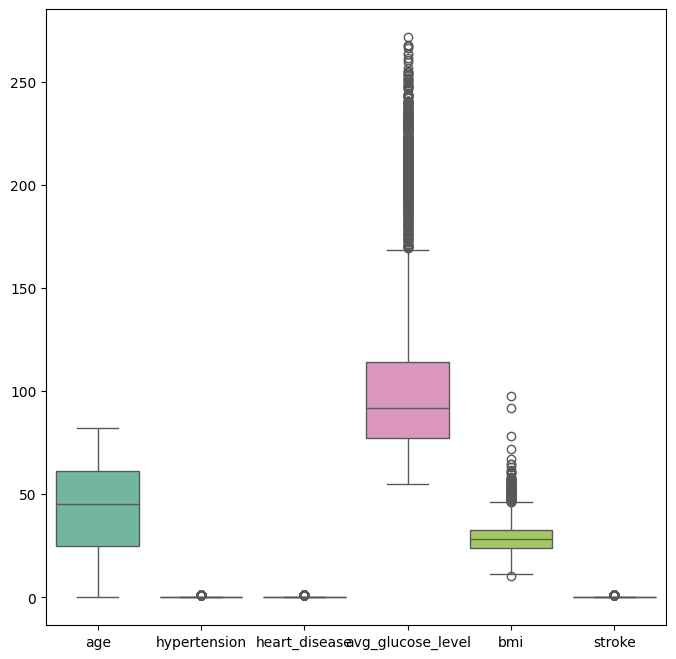

In [11]:
# checking for outliers 

fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(data = data, palette = 'Set2')
plt.show();

In [12]:
print(data['avg_glucose_level'].describe())
print(" ")
print('Count of outliers in avg_glucose_level = ', data[data['avg_glucose_level'] > 114].shape[0] )

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
 
Count of outliers in avg_glucose_level =  1282


In [13]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [14]:
quan = data['avg_glucose_level'].quantile(0.78)
quan2 = data['bmi'].quantile(0.98)
print("Quantile limit for avg_glucose_level = ", quan)
print("Quantile limit for bmi = ", quan2)

Quantile limit for avg_glucose_level =  119.672
Quantile limit for bmi =  48.08199999999997


In [15]:
# removing outliers 

filtered_data = data[data['avg_glucose_level'] < quan]
filtered_data = filtered_data[filtered_data['bmi'] < quan2]
filtered_data.shape


(3915, 10)

In [16]:
data.shape

(5110, 10)

## Encoding

In [17]:
# performing encoding (label encoding)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

gender = encoder.fit_transform( filtered_data['gender'] )
smoking_status = encoder.fit_transform( filtered_data['smoking_status'] )
work_type = encoder.fit_transform( filtered_data['work_type'] )
Residence_type = encoder.fit_transform( filtered_data['Residence_type'] )

In [18]:
filtered_data['work_type'] = work_type
filtered_data['Residence_type'] = Residence_type
filtered_data['smoking_status'] = smoking_status
filtered_data['gender'] = gender
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3915 entries, 2 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3915 non-null   int32  
 1   age                3915 non-null   float64
 2   hypertension       3915 non-null   int64  
 3   heart_disease      3915 non-null   int64  
 4   work_type          3915 non-null   int32  
 5   Residence_type     3915 non-null   int32  
 6   avg_glucose_level  3915 non-null   float64
 7   bmi                3915 non-null   float64
 8   smoking_status     3915 non-null   int32  
 9   stroke             3915 non-null   int64  
dtypes: float64(3), int32(4), int64(3)
memory usage: 275.3 KB


In [19]:
filtered_data.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,2,1,58.57,24.200000,0,1


# Model Building

In [20]:
x = filtered_data.drop('stroke', axis = 1)
y = filtered_data['stroke']

In [21]:
# splitting the dataset for train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [22]:
x_test.shape

(783, 9)

In [23]:
x_train.shape

(3132, 9)

In [24]:
filtered_data.describe()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000
mean,0.406386,41.160920,0.076117,0.038825,2.195147,0.506513,85.735458,27.893662,1.350702,0.037548
std,0.491221,22.513507,0.265220,0.193202,1.109133,0.500021,16.080463,6.625627,1.081914,0.190124
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,2.000000,0.000000,73.540000,23.300000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,2.000000,1.000000,84.930000,27.700000,2.000000,0.000000
75%,1.000000,58.000000,0.000000,0.000000,3.000000,1.000000,97.645000,31.900000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,4.000000,1.000000,119.670000,48.000000,3.000000,1.000000


In [25]:
# Scaling the train and test features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [26]:
# saving scalar objects in a pickle file

import pickle

pickle.dump(std, open('scalar.pkl', 'wb'))


# Model Training

Checking different algorithms for training to get the best accuracy

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [28]:
dt.feature_importances_

array([0.05957085, 0.17226985, 0.03647293, 0.04245377, 0.04038032,
       0.026574  , 0.33912556, 0.21386874, 0.06928398])

In [29]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

Clearly, age, average glucose level and bmi are the most importatnt features for decision tree classifier.

In [30]:
y_pred_dt = dt.predict(x_test_std)

from sklearn.metrics import accuracy_score

ac_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy using decison tree classification algorithm = " +  str(ac_dt*100) + " %")

Accuracy using decison tree classification algorithm = 92.33716475095785 %


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train_std, y_train)

y_pred_lr = lr.predict(x_test_std)

ac_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy using logistic regression algorithm = " +  str(ac_lr*100) + " %")

Accuracy using logistic regression algorithm = 94.89144316730524 %


## K- Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_std, y_train)

y_pred_knn = knn.predict(x_test_std)

ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy using k nearest neighbours algorithm = " +  str(ac_knn*100) + " %")

Accuracy using k nearest neighbours algorithm = 94.6360153256705 %


## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_std, y_train)

y_pred_rf = rf.predict(x_test_std)

ac_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using random forest classification algorithm = " +  str(ac_rf*100) + " %")

Accuracy using random forest classification algorithm = 94.89144316730524 %


## Support Vector Machines

In [34]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train_std, y_train)

y_pred_svc = svc.predict(x_test_std)

ac_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy using support vector classification algorithm = " +  str(ac_svc*100) + " %")

Accuracy using support vector classification algorithm = 94.89144316730524 %


In [35]:
ac_svc == ac_lr

True

Hence, we can conclude equal and maximum accuracy using logistic regression and svc.

## Saving the model

In [36]:
import pickle

pickle.dump(lr, open(r'finalized_model.pkl', 'wb'))

In [37]:
pickle.dump(rf, open(r'finalized_model_rf.pkl', 'wb'))